In [1]:
#install auto_ts(auto time series)
!pip install auto_ts

     |████████████████████████████████| 92kB 3.9MB/s 
     |████████████████████████████████| 1.5MB 7.4MB/s 
     |████████████████████████████████| 972kB 19.4MB/s 
     |████████████████████████████████| 22.3MB 51.0MB/s 
     |████████████████████████████████| 122kB 27.0MB/s 
ERROR: pmdarima 1.8.2 has requirement statsmodels!=0.12.0,>=0.11, but you'll have statsmodels 0.10.2 which is incompatible.
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import auto_ts as AT

import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False


Imported auto_timeseries version:0.0.36. Call by using:
model = auto_timeseries(score_type='rmse',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [3]:
def parse(x):
	return datetime.strptime(x, '%m/%d/%Y')

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/electricity_consumption.csv', parse_dates = ['Bill_Date'],date_parser=parse)

In [5]:
df

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,2016-01-01,365,1423.5,219.00,247.73,31
1,2016-02-01,292,1138.8,175.20,234.11,31
2,2016-03-01,130,507.0,78.00,123.85,29
3,2016-04-01,117,456.3,70.20,111.22,29
4,2016-05-01,136,530.4,81.60,118.37,29
5,2016-06-01,63,245.7,37.80,77.81,32
6,2016-07-01,110,429.0,66.00,86.67,30
7,2016-08-01,176,686.4,105.60,122.40,29
8,2016-09-01,357,1392.3,214.20,223.62,33
9,2016-10-01,235,916.5,141.00,152.54,29


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Bill_Date      53 non-null     datetime64[ns]
 1   On_peak        53 non-null     int64         
 2   Off_peak       53 non-null     float64       
 3   Usage_charge   53 non-null     float64       
 4   Billed_amount  53 non-null     float64       
 5   Billing_days   53 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 2.6 KB


In [7]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().any())
print ("\nUnique values :  \n",df.nunique())

Rows     :  53
Columns  :  6

Features : 
 ['Bill_Date', 'On_peak', 'Off_peak', 'Usage_charge', 'Billed_amount', 'Billing_days']

Missing values :   Bill_Date        False
On_peak          False
Off_peak         False
Usage_charge     False
Billed_amount    False
Billing_days     False
dtype: bool

Unique values :  
 Bill_Date        53
On_peak          51
Off_peak         53
Usage_charge     53
Billed_amount    52
Billing_days      9
dtype: int64


In [8]:
ec_df = df.set_index('Bill_Date')

In [9]:
ec_df.head()

,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
Bill_Date,,,,,
2016-01-01,365,1423.5,219.0,247.73,31
2016-02-01,292,1138.8,175.2,234.11,31
2016-03-01,130,507.0,78.0,123.85,29
2016-04-01,117,456.3,70.2,111.22,29
2016-05-01,136,530.4,81.6,118.37,29


In [10]:
ec_data = ec_df['Billed_amount']
ec_data.head()

Bill_Date
2016-01-01    247.73
2016-02-01    234.11
2016-03-01    123.85
2016-04-01    111.22
2016-05-01    118.37
Name: Billed_amount, dtype: float64

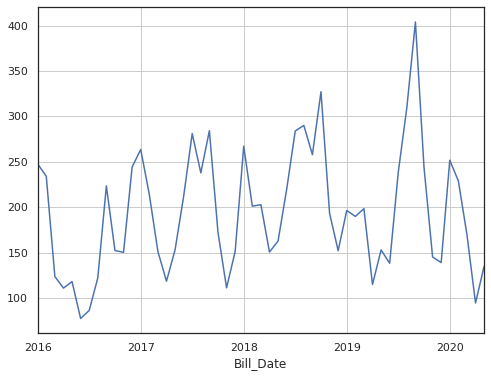

In [11]:
ec_data.plot(grid=True)


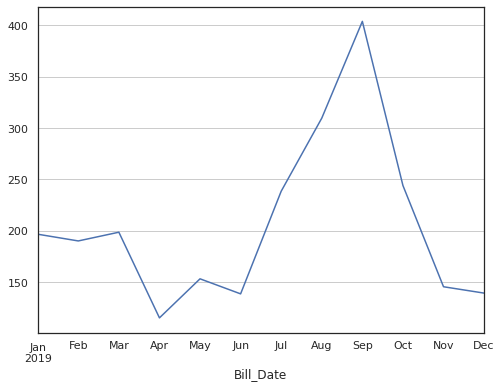

In [12]:
ec_df_2019=ec_df.loc['2019']
ec_data_2019=ec_df_2019['Billed_amount']
ec_data_2019.plot(grid=True)

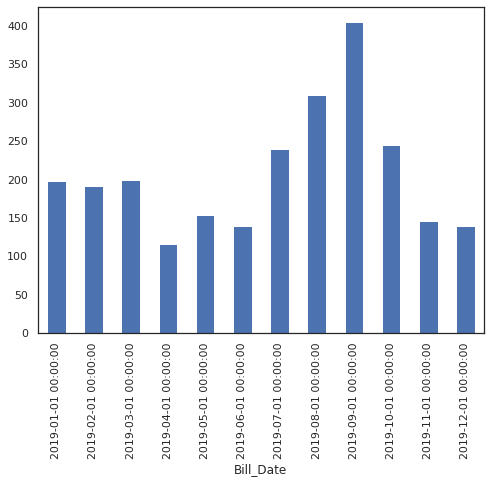

In [13]:
ec_df_2019=ec_df.loc['2019']
ec_data_2019=ec_df_2019['Billed_amount']
ec_data_2019.plot.bar()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ea58e6b10>,
      dtype=object)

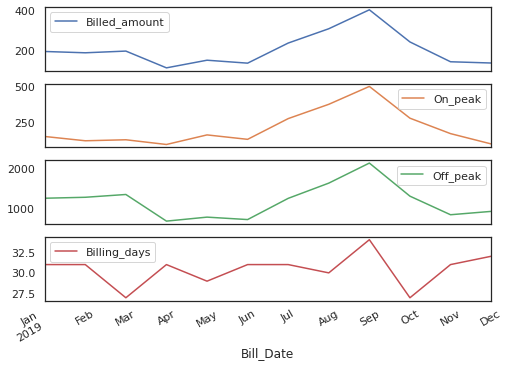

In [14]:
ec_df_2019=ec_df.loc['2019']
ec_data_2019=ec_df_2019[['Billed_amount','On_peak','Off_peak','Billing_days']]
ec_data_2019.plot(subplots=True)

In [15]:
final_df = df.copy()

In [16]:
final_df.head(10)

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,2016-01-01,365,1423.5,219.0,247.73,31
1,2016-02-01,292,1138.8,175.2,234.11,31
2,2016-03-01,130,507.0,78.0,123.85,29
3,2016-04-01,117,456.3,70.2,111.22,29
4,2016-05-01,136,530.4,81.6,118.37,29
5,2016-06-01,63,245.7,37.8,77.81,32
6,2016-07-01,110,429.0,66.0,86.67,30
7,2016-08-01,176,686.4,105.6,122.40,29
8,2016-09-01,357,1392.3,214.2,223.62,33
9,2016-10-01,235,916.5,141.0,152.54,29


In [17]:
final_df=final_df[['Bill_Date','On_peak','Off_peak','Billed_amount','Billing_days']]

In [18]:
train = final_df[:50]
test = final_df[50:]
print(train.shape, test.shape)
train.head()

(50, 5) (3, 5)


,Bill_Date,On_peak,Off_peak,Billed_amount,Billing_days
0,2016-01-01,365,1423.5,247.73,31
1,2016-02-01,292,1138.8,234.11,31
2,2016-03-01,130,507.0,123.85,29
3,2016-04-01,117,456.3,111.22,29
4,2016-05-01,136,530.4,118.37,29


In [19]:
ts_column = 'Bill_Date'
sep = ','
target = 'Billed_amount'

Use Verbose=1 for more detailed charts

In [ ]:
ml_dict = AT.auto_timeseries(train, ts_column,
                            target, sep,  score_type='rmse', forecast_period=6,
                            time_interval='Months', non_seasonal_pdq=None, seasonality=True,
                            seasonal_period=12,seasonal_PDQ=None, model_type=['best'],
                            verbose=2)

In [23]:
ml_dict = AT.auto_timeseries(score_type='rmse', non_seasonal_pdq=(2,1,2), seasonality=True, model_type=['best'], verbose=2)

In [25]:
ml_dict

In [ ]:
ml_dict.fit(traindata=train[['Bill_Date','Billed_amount']], ts_column='Bill_Date', target='Billed_amount', cv=3)

In [ ]:
ml_dict.get_leaderboard()

In [ ]:
ml_dict.get_cv_scores()

In [ ]:
results_dict = ml_dict.get_ml_dict()
results_dict

In [33]:
results_dict['auto_SARIMAX']['forecast']

[array([160.80677993, 215.30496206, 195.14222643, 224.17910818,
        207.06634403]),
 array([143.8689546 , 178.47062915, 194.86562228, 223.21325042,
        202.46918096]),
 array([405.68847567, 302.68749245, 250.12853014, 221.46948323,
        220.7903006 ])]

In [35]:
future_predictions = ml_dict.predict(testdata=test[['Bill_Date','Billed_amount']], model='auto_SARIMAX')  
future_predictions

Billed_amount,yhat,mean_se,mean_ci_lower,mean_ci_upper
2020-03-01,210.305594,52.050154,108.289166,312.322022
2020-04-01,175.975253,58.824392,60.681563,291.268944
2020-05-01,192.464518,58.828917,77.161959,307.767077


In [36]:
test

,Bill_Date,On_peak,Off_peak,Billed_amount,Billing_days
50,2020-03-01,151,1179.0,170.16,29
51,2020-04-01,75,625.0,94.85,29
52,2020-05-01,147,686.0,135.19,29


In [39]:

future_predictions = ml_dict.predict(testdata=test[['Bill_Date','Billed_amount']], model='VAR')  
future_predictions

(Error) Model of type 'VAR' does not exist. No predictions will be made.


In [40]:
future_predictions = ml_dict.predict(testdata=test[['Bill_Date','Billed_amount']], model='Prophet')  
future_predictions

Building Forecast dataframe. Forecast Period = 3


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
50,2020-02-29,236.509372,224.574221,326.911223,236.509371,236.509373,38.754600,38.754600,38.754600,38.754600,38.754600,38.754600,0.0,0.0,0.0,275.263972
51,2020-03-31,237.943874,85.088043,190.006012,237.943870,237.943877,-99.361344,-99.361344,-99.361344,-99.361344,-99.361344,-99.361344,0.0,0.0,0.0,138.582529
52,2020-04-30,239.332101,93.904143,202.063184,239.332094,239.332109,-90.347428,-90.347428,-90.347428,-90.347428,-90.347428,-90.347428,0.0,0.0,0.0,148.984673
